In [1]:
# Loading libraries
from cellpose import plot
from cellpose import models
from cellpose import core, utils, io, models, metrics
from natsort import natsorted
from glob import glob
import os
from matplotlib import pyplot as plt
import numpy as np
import pathlib
current_dir = pathlib.Path().absolute()

In [2]:
# Directories
train_dir = "/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/train2" 
test_dir = "/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/test2"

# String to detect masks in the folder
string_masks='_masks'
# file extension
file_extension ='.tif'

# Loading files
train_files = natsorted(glob(train_dir+'/*'+file_extension))
train_seg = natsorted(glob(train_dir+'/*'+string_masks+file_extension))
test_files = natsorted(glob(test_dir+'/*'+file_extension))
test_seg = natsorted(glob(test_dir+'/*'+string_masks+file_extension))

# model output folder
model_name = "cyto_gapdh"
model_path = current_dir.joinpath('temp_models',model_name)
model_path.mkdir(parents=True, exist_ok=True)

In [3]:
# Parameters
#initial_model = "cyto" # ['cyto','nuclei','tissuenet','livecell','cyto2','CP','CPx','TN1','TN2','TN3','LC1','LC2','LC3','LC4','None']
initial_model = '/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_models/model_test2/models/model_test2'
Channel_to_use_for_training = 0 #["0: Grayscale", "3: Blue", "2: Green", "1: Red"]
Second_training_channel= 0 # ["0: None", "3: Blue", "2: Green", "1: Red"]
channels = [Channel_to_use_for_training, Second_training_channel]

# Machine learning parameters
n_epochs =  500 #default, 500
learning_rate = 0.2 #default, 0.2
weight_decay = 0.00001 # default, 0.00001

In [4]:
# start logger (to see training across epochs)
logger = io.logger_setup()
# DEFINE CELLPOSE MODEL (without size model)
model = models.CellposeModel(gpu=True, pretrained_model=initial_model)
# get files
output = io.load_train_test_data(train_dir, test_dir, mask_filter=string_masks)
train_data, train_labels, _, test_data, test_labels, _ = output
new_model_path = model.train(train_data, train_labels, 
                              test_data=test_data,
                              test_labels=test_labels,
                              channels=channels, 
                              save_path=model_path, 
                              n_epochs=n_epochs,
                              learning_rate=learning_rate, 
                              weight_decay=weight_decay, 
                              nimg_per_epoch=8,
                              model_name=model_name)
# diameter of labels in training images
diam_labels = model.diam_labels.copy()

2023-11-08 15:12:14,699 [INFO] WRITING LOG OUTPUT TO /home/luisub/.cellpose/run.log
2023-11-08 15:12:14,700 [INFO] 
cellpose version: 	2.2.3 
platform:       	linux 
python version: 	3.8.12 
torch version:  	1.10.2
2023-11-08 15:12:14,700 [INFO] >>>> loading model /home/luisub/Desktop/FISH_Processing/cell_segmentation/models/model_test2/models/model_test2
2023-11-08 15:12:16,287 [INFO] ** TORCH CUDA version installed and working. **
2023-11-08 15:12:16,288 [INFO] >>>> using GPU
2023-11-08 15:12:16,402 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-11-08 15:12:16,403 [INFO] >>>> model diam_labels =  147.574 (mean diameter of training ROIs)
2023-11-08 15:12:16,406 [INFO] not all flows are present, running flow generation for all images
2023-11-08 15:12:16,419 [INFO] 14 / 14 images in /home/luisub/Desktop/FISH_Processing/cell_segmentation/human_in_the_loop/train2 folder have labels
2023-11-08 15:12:16,420 [INFO] not all flows are present, running f

100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

2023-11-08 15:12:23,481 [INFO] computing flows for labels



100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

2023-11-08 15:12:26,632 [INFO] >>>> median diameter set to = 30
2023-11-08 15:12:26,633 [INFO] >>>> mean of training label mask diameters (saved to model) 147.574
2023-11-08 15:12:26,634 [INFO] >>>> training network with 2 channel input <<<<
2023-11-08 15:12:26,634 [INFO] >>>> LR: 0.20000, batch_size: 8, weight_decay: 0.00001
2023-11-08 15:12:26,635 [INFO] >>>> ntrain = 14, ntest = 6
2023-11-08 15:12:26,636 [INFO] >>>> nimg_per_epoch = 14


2023-11-08 15:12:27,234 [INFO] Epoch 0, Time  0.6s, Loss 0.1843, Loss Test 0.4371, LR 0.0000
2023-11-08 15:12:27,619 [INFO] saving network parameters to /home/luisub/Desktop/FISH_Processing/cell_segmentation/models/model_test3/models/model_test3
2023-11-08 15:12:29,270 [INFO] Epoch 5, Time  2.6s, Loss 0.1683, Loss Test 0.4438, LR 0.1111
2023-11-08 15:12:31,280 [INFO] Epoch 10, Time  4.6s, Loss 0.1785, Loss Test 0.4350, LR 0.2000
2023-11-08 15:12:35,226 [INFO] Epoch 20, Time  8.6s, Loss 0.1785, Loss Test 0.4240, LR 0.2000
2023-11-08 15:12:39,188 [INFO] Epoch 30, Time 12.6s, Loss 0.1816, Loss Test 0.4445, LR 0.2000
2023-11-08 15:12:43,130 [INFO] Epoch 40, Time 16.5s, Loss 0.1770, Loss Test 0.4594, LR 0.2000
2023-11-08 15:12:47,089 [INFO] Epoch 50, Time 20.5s, Loss 0.1734, Loss Test 0.4721, LR 0.2000
2023-11-08 15:12:51,044 [INFO] Epoch 60, Time 24.4s, Loss 0.1702, Loss Test 0.4473, LR 0.2000
2023-11-08 15:12:54,988 [INFO] Epoch 70, Time 28.4s, Loss 0.1726, Loss Test 0.4593, LR 0.2000
202

In [5]:
# get files (during training, test_data is transformed so we will load it again)
output = io.load_train_test_data(test_dir, mask_filter=string_masks)
test_data, test_labels = output[:2]

# run model on test images
masks = model.eval(test_data, channels=channels,diameter=diam_labels)[0]

# check performance using ground truth labels
ap = metrics.average_precision(test_labels, masks)[0]
print('')
print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')

2023-11-08 15:15:47,431 [INFO] not all flows are present, running flow generation for all images
2023-11-08 15:15:47,438 [INFO] 6 / 6 images in /home/luisub/Desktop/FISH_Processing/cell_segmentation/human_in_the_loop/test2 folder have labels
2023-11-08 15:15:51,837 [INFO] 100%|##########| 6/6 [00:04<00:00,  1.36it/s]

>>> average precision at iou threshold 0.5 = 0.864


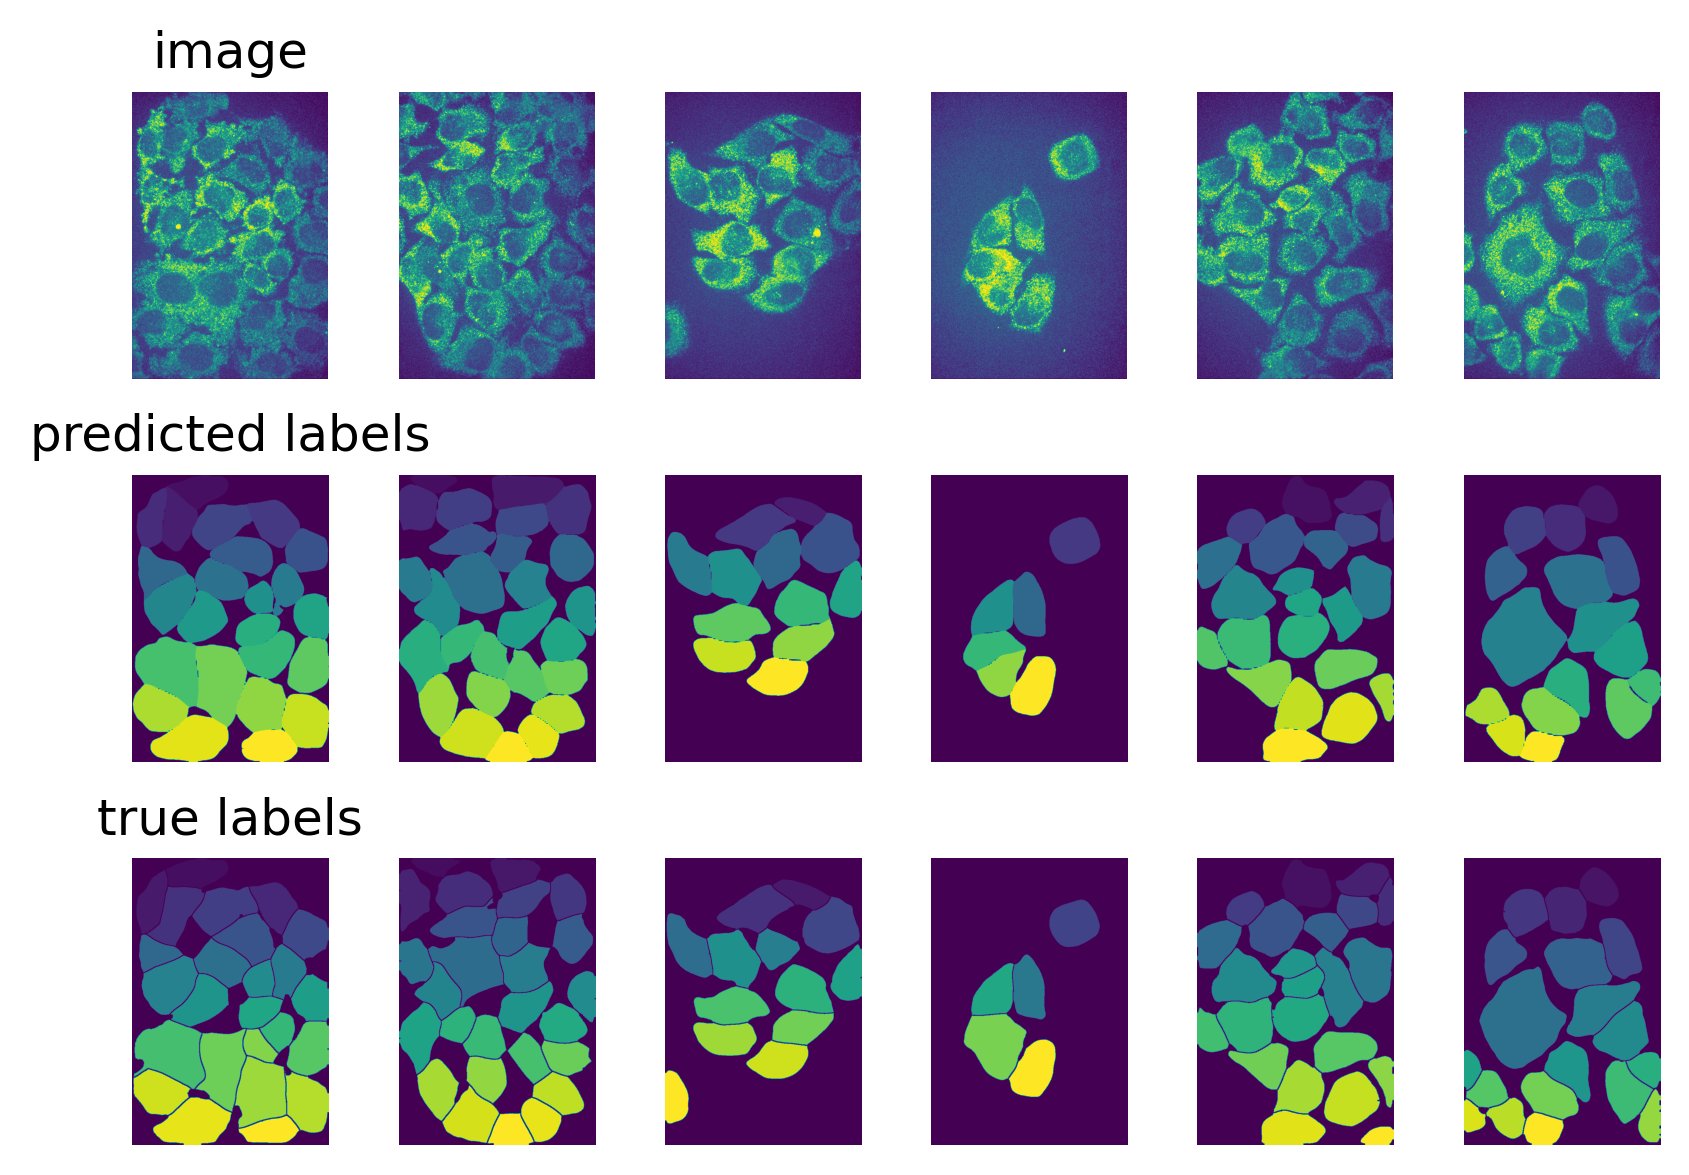

In [6]:
plt.figure(figsize=(25,4), dpi=300)
for k,im in enumerate(test_data):
    img = im.copy()
    plt.subplot(3,len(train_files), k+1)
    img = np.vstack((img, np.zeros_like(img)[:1]))
    plt.imshow(img)
    plt.axis('off')
    if k==0:
        plt.title('image')

    plt.subplot(3,len(train_files), len(train_files) + k+1)
    plt.imshow(masks[k])
    plt.axis('off')
    if k==0:
        plt.title('predicted labels')

    plt.subplot(3,len(train_files), 2*len(train_files) + k+1)
    plt.imshow(test_labels[k])
    plt.axis('off')
    if k==0:
        plt.title('true labels')
plt.tight_layout()

In [7]:
new_model_path

'/home/luisub/Desktop/FISH_Processing/cell_segmentation/models/model_test3/models/model_test3'